Préambule :

In [1]:
import matplotlib.pyplot as plt
from random import randint
from collections import deque

# <div align="center"> Info 2 : Structures de données - Partie 1</div>

Durant cette séance, nous allons étudier différentes structures de données ("objet" contenant des données) les listes, les piles et les files.

# Les listes

## Usage des listes

Les listes sont des objets python qui vous sont normalement désormais bien connus. Vérifions malgré tout certaines notions... Pour les cellules de codes suivantes, il est conseillé de réfléchir à l'effet de chaque commande, puis de le vérifier en exécutant.

Ecriture d'une même liste de 3 façons différentes :

In [21]:
L = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

L2 = []
for i in range(10):
    L2.append(i)
    
L3 = [i for i in range(10)]

L == L2 and L == L3

True

Concaténation :

In [22]:
L2 + L3

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Accéder à un ou plusieurs éléments de la liste :

In [3]:
L = [2,"chat", True, [0,1], (1,0), "poule"]

print(L[3])
print(L[2:5])
print(L[:4])
print(L[3:])
print(L[-1])

[0, 1]
[True, [0, 1], (1, 0)]
[2, 'chat', True, [0, 1]]
[[0, 1], (1, 0), 'poule']
poule


## Une remarque importante

Il faut être particulièrement attentif à la copie d'une liste. En effet, pour de *simples* variables :

In [2]:
a = 3
b = a
b = 2
print("a :",a,", b :",b)

a : 3 , b : 2


Mais pour des listes :

In [4]:
L = [1,2,3,4]
M = L
M[2] = 5
print(L)

[1, 2, 5, 4]


Ceci s'explique par le fait que `L` et `M` sont des variables qui pointent en réalité vers la même adresse mémoire : `L` et `M` sont en réalité juste deux façons de nommer le même objet. Modifier `M` modifie les données stockées en mémoire; comme la liste `L` est une adresse vers les mêmes données, elle est aussi modifiée.

Pour éviter ce phénomène, on utilisera la fonction `copy` :

In [5]:
L = [1,2,3,4]
M = L.copy()
M[2] = 5
print(L)

[1, 2, 3, 4]


Pour la même raison, une fonction modifie la liste surlaquelle elle travaille, même si cette liste n'est pas retournée par la fonction. Par exemple :

In [13]:
def test_var(v):
    v+=1
    return v

Appliquée à la variable `a`, cette fonction retourne une valeur incrémentée de 1. Mais la valeur de `a` n'est pas modifiée :

In [20]:
a = 2
print("Valeur retournée : ",test_var(a)," / Valeur finale de a : ",a)

Valeur retournée :  3  / Valeur finale de a :  2


Testons avec une liste :

In [19]:
def test_liste(L):
    for i in range(len(L)):
        L[i]+=1
    return L

M = [1,2,3,4]
print("Liste retournée : ",test_liste(M)," / Liste M : ",M)

Liste retournée :  [2, 3, 4, 5]  / Liste M :  [2, 3, 4, 5]


Ainsi la liste initiale `M` a été modifiée à l'intérieur de la fonction... On pourra même, pour ce type de fonction, se passer du `return ...`, puisque on peut récupérer le résultat dans la liste passée en argument !

**A retenir :**

- pour garder une copie d'une liste, il faut faire agier la fonction `copy` : `M = L.copy()`

- faire agir une fonction sur une liste modifie cette liste.

**Pour aller plus loin...** Un comportement similaire peut être obtenu avec les variables "classiques" en les définissant comme globales :

In [21]:
def test_var_b():
    global a
    a+=1
    return a

a = 2
print("Valeur retournée : ",test_var_b()," / Valeur finale de a : ",a)

Valeur retournée :  3  / Valeur finale de a :  3


Ici la fonction `test_var_b` va chercher la valeur de la variable `a` à l'extérieur de la fonction.

## Mais au fait, qu'est-ce qu'une liste ?


Les listes sont simple d'usage, mais il faut pas perdre de vue que les listes python sont des objets bien mystérieux, et bien plus compliqués qu'espéré, mais c'est aussi ce qui fait une grande partie du succès du langage python ! Comparons ces listes à des objets plus simples :

- Un tuple de python est une structure qui permet de stocker des données de manière similaire aux listes, mais c'est une structure de données non modifiable :

In [3]:
T=(1,2,3)
T.append(4)

AttributeError: 'tuple' object has no attribute 'append'

Ou bien :

In [4]:
T[0] = 5

TypeError: 'tuple' object does not support item assignment

- Un tableau python, associé à la commande *array* de la bilbiothèque *numpy*, permet aussi de créer un une structure de donnée similaire à une liste. L'avantage de ces structures, c'est qu'elles présentent un accès "rapide" à chaque élément. En effet, de façon schématique, pour accéder au n<sup>ième</sup> élément d'un tableau, l'ordinateur n'a pas besoin de parcourir les (n-1)<sup>ièmes</sup> éléments précédents. Ceci est rendu possible car python stocke en mémoire, avec chaque tableau, sa taille : cela permet de savoir directement où trouver chaque élément. On dit que cet élément est accessible en un temps  $\mathcal{O}(1)$ pour un tableau, alors que s'il fallait parcourir tous les éléments précédant celui recherché, le temps nécessaire serait  $\mathcal{O}(n)$, avec $n$ la taille du tableau.
La contrepartie de l'efficacité d'une telle structure, c'est qu'il faut "réserver" en mémoire la place pour le tableau, et cette place réservée dépend de la taille $n$ du tableau : il n'est pas alors possible, facilement (c'est-à-dire rapidement), de changer la taille du tableau, comme le fait la commande *append* pour une liste.

Les listes sont en réalités des objets complexes, s'appuyant sur des tableaux, mais pouvant être redimensionnées *à moindre frais* !

# Les piles et les files

## Qu'est-ce qu'une file et un pile ?

Une **file** est un ensemble de données qui ne peut être modifié qu'en ajoutant un élément à une extrémité, ou en retirant un à l'**autre** extrémité : c'est le principe du *premier arrivé, premier sorti* ou FIFO en anglais : *First In, First Out*.

*Exemples :* Toutes les files d'attentes, dans le cas de gens civilisés... Il existe aussi de nombreuses files d'attentes "virtuelles" en  informatique (par exemple file d'attentes d'instructions avant traitement par le processeurs, file d'attente de parcoursup, ...). Ces structures de données sont aussi intéressantes dans le cadre de la gestion des stocks et denrées périssables.


Une **pile** est un ensemble de données qui ne peut être modifié qu'en ajoutant ou retirant un élément. Ces opérations de modifications ne peuvent avoir lieu qu'à la **même** extremité de la pile : c'est le principe du *dernier arrivé, premier sorti* ou LIFO en anglais : *Last In, First Out*.

*Exemples :*
    
- Pile de Caddies au supermarché : les caddies sont rangés les uns derrières les autres. On retire un caddie par la même extremité que celle où on viendra reposer son caddie. Ainsi le caddie qu'on peut sortir est uniquement le dernier inséré !
    
- Les tours de Hanoï :

![](im/hanoi.jpg)   
    
    
Il est ici seulement possible d'ajouter ou de retirer un disque au sommet de chaque tour, qu'on pourrait nommer *pile*.

Une **pile** ou une **file** est une notion théorique, qui possède de multiples réalisations pratiques. Il est possible de les utiliser dans un grand nombre de langage informatique. Pour simplifier, dans la suite, nous étudierons seulement les piles (la manipulation des files repose sur une logique proche, elle pourra être déduite de celle des piles).

## Structure de Pile en python

La structure de pile est une structure qui pourrait tout à fait reposer sur l'objet python "liste" : en effet, il est possible d'ajouter (commande `append`) ou de retirer (commande `pop`) un élement à la fin de la liste : 

In [23]:
L=[1,2,3]
L.append(4)
print(L)

[1, 2, 3, 4]


On a bien ici ajouté un élément à une extremité de la liste, qui constitue une pile. En ré-itérant la commande *append*, on ajoutera toujours un élément à la **même** extremité de cette pile.

Puis, pour retirer cet élément :

In [7]:
L.pop()
print(L)

[1, 2, 3]


Cependant, dans le cadre pédagogique de cette séance, nous n'utiliserons pas les objets listes pour nos piles : en effet, il est très tentant, avec des piles qui reposent sur des listes, de réaliser des opérations qui sont *interdites* sur de piles (extraire un élément au milieu, ...)

Hors du cadre de ces séances, c'est une pratique réellement employée, pour 2 principales raisons :

- Comme l'a dit Spiderman, *un grand pouvoir implique de grandes responsabilités* : utiliser des objets complexes (tels que les listes) pour des fonctions simples (empiler ou dépiler) ajoutent des possibilités et effets complexes, parfois inconnus ou non maîtrisés de l'auteur. De façon plus générale, pour des réalisations demandant une *robustesse* extrème, on utilise fréquemment, en informatique, des langages très *basiques*, avec peu de possibilités, afin d'éviter tout effet imprévu.

- Un objet plus simple, devant remplir un cahier des charges plus restreint, peut-être optimisé pour remplir ses (peu nombreuses) missions de façon plus efficace

Nous utiliserons ainsi les structures `deque`, qui sont une généralisation des piles et des files (deque se prononce "dèque" et est l'abréviation de l'anglais *double-ended queue*) : il est possible d'ajouter et retirer des éléments par les deux bouts des deques. Ces opérations sont très efficaces, car les deques sont optimisés pour (plus qu'une liste, qui peut changer de taille, mais de façon plus couteuse en temps d'execution....en contrepartie de ses nombreuses autres fonctions !)

On utilisera pour ces structure *deque* les *méthodes* `append`, `pop` et `len` en employant la même syntaxe qu'avec les listes.

## Créer et utiliser des piles

Pour comprendre le fonctionnement des piles, et les utiliser dans des applications, nous allons créer les fonctions **justes nécessaires** à leur fonctionnement. Ces piles s'appuyeront sur des deque.

Voici les différentes fonctions essentielles à créer :
    
- <code>creer_pile()</code> : retourne une pile (ici une liste) vide  

In [2]:
def creer_pile():
    return deque()

Utilisation :

In [25]:
pile=creer_pile()
print("Contenu de la pile :",pile)

Contenu de la pile : deque([])


- <code>empiler(P,v)</code> : ajoute (empile) l'élément v à la pile P, à compléter :

In [3]:
def empiler(P,v):
    P.append(v)

Utilisation :

In [27]:
empiler(pile,3)
print("Contenu de la pile :",pile)

Contenu de la pile : deque([3])


Attention, on ne peut pas empiler plusieurs eléments en une seule commande :

In [28]:
empiler(pile,3,4)

TypeError: empiler() takes 2 positional arguments but 3 were given

Mais :

In [29]:
empiler(pile,1)
empiler(pile,4)
print("Contenu de la pile :",pile)

Contenu de la pile : deque([3, 1, 4])


- <code>depiler()</code> dépile (supprime le dernier élément de la pile), et retourne la nouvelle pile. **Attention** : il faut s’assurer que l’utilisation de cette fonction ne provoque pas d’erreur quand la pile est vide ; il vaudra mieux dans ce cas afficher un message d’erreur. A compléter :

In [4]:
def depiler(P):
    if len(P)==0:
        raise ValueError("Erreur : pile vide") ## permet d'afficher un magnifique message rouge d'alerte
    else :
        P.pop()

Utilisation :

In [31]:
depiler(pile)
print("Contenu de la pile :",pile)
depiler(pile)
print("Contenu de la pile :",pile)
depiler(pile)
print("Contenu de la pile :",pile)
depiler(pile)
print("Contenu de la pile :",pile)

Contenu de la pile : deque([3, 1])
Contenu de la pile : deque([3])
Contenu de la pile : deque([])


ValueError: Erreur : pile vide

Remarque : Cette fonction modifie forcement la pile P, il n'est donc pas nécessaire d'appliquer <code> pile=depiler(pile)</code>.

D'autres fonctions à écrire :


- <code>taille(P)</code> retourne la taille de la pile
- <code>est_vide(P)</code> retourne une variable booléenne : *True* si la liste est vide, *False* sinon
- <code>sommet(P)</code> retourne la valeur du sommet de la pile, sans le dépiler. **Attention** : il faut s’assurer que l’utilisation de cette fonction ne provoque pas d’erreur quand la pile est vide; il vaudra mieux dans ce cas afficher un message d’erreur.

In [5]:
def taille(P):
    return len(P)

def est_vide(P):
    return len(P)==0

# Autre possibilité :
def est_vide(P):
    return P == deque([])

def sommet(P):
    if est_vide(P)==1:
        raise ValueError("Erreur : pile vide")## permet d'afficher un magnifique message rouge d'alerte dans le shell
    else :
        return P[-1]

Utilisation :

In [33]:
pile=creer_pile()
print("Taille de la pile :",taille(pile))
print("Piste vide ? ",est_vide(pile))
print("Sommet de la pile :",sommet(pile))

Taille de la pile : 0
Piste vide ?  True


ValueError: Erreur : pile vide

In [34]:
empiler(pile,5)
empiler(pile,2)
print("Taille de la pile :",taille(pile))
print("Piste vide ? :",est_vide(pile))
print("Sommet de la pile :",sommet(pile))

Taille de la pile : 2
Piste vide ? : False
Sommet de la pile : 2


**Exercice :**
Programmer la fonction <code>taille_bis(P)</code> uniquement à l’aide des fonctions <code>empiler</code>,<code>depiler</code> et <code>est_vide</code>.

In [44]:
def taille_bis(P):
    taille = 0
    while est_vide(P) == 0:
        depiler(P)
        taille += 1
    return(taille)

print("Taille de la pile :",taille_bis(pile))

Taille de la pile : 2


Fonctionne ! Mais attention, la pile est modifiée :

In [45]:
pile

deque([])

**Exercice :** Ecrire une fonction `renverser(pile)` prenant en argument une pile et qui retourne la pile obtenue en inversant l'ordre des éléments de `pile`. La pile `pile`pourra être vidée, mais seules les fonctions précédemment définies pourront être utilisées.

In [46]:
def renverser(pile):
    n = taille(pile)
    Nouv_pile = creer_pile()
    for i in range(n):
        s = sommet(pile)
        depiler(pile)
        empiler(Nouv_pile,s)
    return Nouv_pile

In [47]:
P = creer_pile()
L = ["patates",3,"travers","à","flux","le","est",541]
for elem in L :
    empiler(P,elem)
    
print(renverser(P))

deque([541, 'est', 'le', 'flux', 'à', 'travers', 3, 'patates'])


## Application directe : vérifier un parenthésage
    
Le but est de résoudre le problème suivant : on considère une expression mathématique, par exemple : <code>Expression = "1+(3*2+(5/(1+3)))"</code>, écrite sous forme d'une chaîne de caractères, et on veut déterminer si elle est bien parenthésée. Cela signifie qu’elle contient autant de parenthèses ouvrantes et fermantes, qui de plus sont bien placées : quand on parcourt la chaîne de gauche à droite, à tout moment, on a rencontré au moins auant de parenthèses ouvrantes que fermantes.

On utilisera bien évidemment la notion de pile et les fonctions définies précédemment.

**Exercice** : Ecrire une fonction <code>Verif_par(Exp)</code> vérifiant si l'expression <code>Exp</code> est bien parenthèsée. Cette fonction retournera une variable booléenne.

In [48]:
def Verif_par(Exp):
    pile=creer_pile()
    for i in range(len(Exp)):
        if Exp[i]=='(': # Si on rencontre une parenthèse ouverte
            empiler(pile,i)  # On ajoute dans la pile sa position
        elif Exp[i]==')':# Si on rencontre une parenthèse fermée
            if est_vide(pile)==1: # Si il n'y avait aucune parenthèse déjà ouverte : erreur !
                return False
            else :
                depiler(pile) # On "ferme" la dernière parenthèse ouverte
    return est_vide(pile)   # Si il reste des parenthèses ouvertes non fermées -> problème, sinon c'est tout bon !               

In [49]:
Expression =input("Rentrer l'expression à vérifier ")
print("Bien parenthèsée : ",Verif_par(Expression))

Rentrer l'expression à vérifier  1+(3*2+5/(1+3)))


Bien parenthèsée :  False


**Pour aller plus loin...Exercice** : Ecrire une fonction <code>Verif_par_bis(Exp)</code> vérifiant si l'expression <code>Exp</code> est bien parenthèsée. Cette fonction retournera une variable booléenne, et l'indice de la parenthèse qui pose problème le cas échéant.

In [50]:
def Verif_par_bis(Exp):
    pile=creer_pile()
    for i in range(len(Exp)):
        if Exp[i]=='(': # Si on rencontre une parenthèse ouverte
            empiler(pile,i)  # On ajoute dans la pile sa position
        elif Exp[i]==')':# Si on rencontre une parenthèse fermée
            if est_vide(pile)==1: # Si il n'y avait aucune parenthèse déjà ouverte : erreur !
                return False,"parenthèse fermée en trop à la position ",i
            else :
                depiler(pile) # On "ferme" la dernière parenthèse ouverte
    if est_vide(pile)==1:
        return True
    else:
        return False, "positions des parenthèses ouvertes non fermées ",pile

In [51]:
Expression =input("Rentrer l'expression à vérifier ")
print("Bien parenthèsée : ",Verif_par_bis(Expression))

Rentrer l'expression à vérifier  1+(3*2+(5/(1+3)))+3)


Bien parenthèsée :  (False, 'parenthèse fermée en trop à la position ', 19)


# Autres applications

## Notation Polonaise Inverse
    
Il fut un temps (que les moins de 20 ne peuvent pas connaître…) où la guerre des calculatrices n’opposait pas seulement Casio et Texas Instrument, mais aussi HP. Cette marque commercialisait des calculatrices fonctionnant avec la NPI, soit la Notation Polonaise Inverse.
    
Dans cette notation, les opérateurs arithmétiques (+,*,…) sont placés après les nombres auxquels ils vont s’appliquer. Par exemple, pour calculer « 3+4 », on rentre « 3 » puis « 4 » et enfin « + » : l’addition s’applique au deux précédents nombres rentrés.
Pour des expressions plus complexes, voici d’autres exemples : 

- Pour calculer $((1 + 2) \times 4) + 3$ : on rentre tout d’abord le premier nombre rencontré : « 1 », puis le second « 2 ». Ces deux nombres doivent être additionnés, il rentre donc l’opérateur « + ». On rentre ensuite le nombre suivant, « 4 », puis l’opérateur « * » pour multiplier ce dernier nombre au résultat précédent. Enfin on rentre le dernier nombre « 3 », et l’opérateur « + » pour l’additionner au résultat précédent.

- Pour calculer $3 \times (5 + 10) - 1$ : on rentre le premier nombre « 3 », puis le second « 5 ». Attention, la multiplication ne concerne pas 3 et 5, on ne rentre donc pas tout de suite cet opérateur ! On rentre alors le nombre suivant,  « 10 ». On doit additionner ces deux dernières entrées, on rentre donc l’opérateur « + », puis l’opérateur « * », pour multiplier le résultat précédent avec le premier nombre rentré, 3. Enfin, on rentre le dernier nombre « 1 », et l’opérateur « - ».

*Remarques :*

- *en NPI, pour une même expression, il peut y avoir différentes façons de rentrer le calcul (voir tableau ci-dessous)*

- *l’avantage de cette notation est de se passer des parenthèses !*
      
![](im/tab2.png)      
    
Cette notation peut se traiter de façon très élégante avec la notion de pile : chaque nombre rentré doit être empilé, et lorsqu’un opérateur est rentré, il s’applique aux deux éléments au sommet de cette pile. Ces deux éléments sont dépilés, et le résultat de l’opération est empilé. Le résultat final est la dernière valeur contenue dans la pile. 
Par exemple, pour le calcul $(1 + 2) \times 4 + 3$  voici la pile après chaque entrée :

![](im/tab.png)      
 
**Exercice :**

- Sur **papier**, pour le calcul $3 \times (5 + 10) - 1$, représenter le même tableau affichant le contenu de la pile après chaque opération.

- Proposer une fonction `NPI(Exp)` évaluant l’expression `Exp`. Les expressions à calculer seront sous forme d’une liste, soit, pour notre premier exemple : `Expression = [1,2,"+",4,"*",3,"+"]`.
On supposera que les expressions sont bien écrites, et on se limitera aux 4 opérateurs + , - , *  et / .  On utilisera naturellement la notion de pile.

<font color=red> Correction :</font>

Entrée| Pile
:------:|:------:
3|[3]
5|[3,5]
10|[3,5,10]
+|[3,15]
\*|[45]
1|[45,1]
-|[44]

In [6]:
def NPI(Exp):
    """ Retourne le résultat du calcul de l'expression Exp (liste de chaîne de caractères représenant un nombre ou une opération), via la syntaxe "NPI" """
    P=creer_pile()
    for elem in Exp: # On parcourt toute l'expression 
        if elem == '+' or elem == '-' or elem == '*' or elem == '/': # si on tombe sur un opérateur, il faut réaliser l'opération avec les deux derniers éléments empilés
            a = sommet(P)
            depiler(P)
            b = sommet(P)
            depiler(P)
            if elem == '+':
                empiler(P,a+b)
            elif elem == '-':
                empiler(P,b-a)
            elif elem == '*':
                empiler(P,a*b)
            else:
                empiler(P,b/a)
        else : # sinon on continue d'empiler
            empiler(P,elem)
    return P

In [7]:
Expression=[1,2,"+",4,"*",3,"+"]
Expression2=[3,5,10,"+","*",1,"-"]
print("Evaluation de ",Expression," : ",NPI(Expression))
print("Evaluation de ",Expression2," : ",NPI(Expression2))

Evaluation de  [1, 2, '+', 4, '*', 3, '+']  :  deque([15])
Evaluation de  [3, 5, 10, '+', '*', 1, '-']  :  deque([44])


## Tour de Magie
Cet exercice  a pour but de modéliser des actions sur un paquet de cartes à jouer. Un paquet de cartes (ou une partie seulement du paquet) peut être modélisé par une pile.

**1. Couper le jeu de cartes** Écrire une fonction `couper(P)` qui prend une pile et qui retire de son sommet `k` éléments un à un qui sont replacés dans une autre pile `Pa`. `k` est un nombre tiré aléatoirement, inférieur au nombre d'éléments de P, grâce à `k = randint(1,taille(P))`. La fonction renvoie `Pa`.

In [53]:
def couper(P):
    k = randint(1,taille(P))
    Pa = creer_pile()
    for i in range(k):
        s = sommet(P)
        depiler(P)
        empiler(Pa,s)
    return Pa  

**2. Battre les cartes** On divise le paquet en 2 sous-paquets, afin de le mélanger. Ecrire une fonction `melanger(P1,P2)` qui mélange les éléments des piles `P1` et `P2` dans une troisième pile de la façon suivante : tant qu’aucune pile n’est vide, on retire aléatoirement un élément au sommet d’une des deux piles et on l’empile sur la pile résultat. On utilisera pour cela `randint(1,2)` qui réalise un tirage aléatoire des nombres 1 et 2 (elle retourne 1 ou 2, au hasard). Lorsqu'une pile est vide, on empile le reste de la pile non vide sur la pile résultat.

In [54]:
def melanger(P1,P2):
    P = creer_pile() # pile résultat
    while est_vide(P1)== False  and est_vide(P2)==False : # tant qu'auncune pile n'est vide
        r = randint(1,2) # on tire au hasard la pile à dépiler
        if r == 1: # si il s'agit de la première
            s = sommet(P1)
            depiler(P1)
            empiler(P,s)
        else : # sinon il s'agit de la deuxième
            s = sommet(P2)
            depiler(P2)
            empiler(P,s)
    while est_vide(P1)==False: # s'il reste des éléments dans la première, on la vide dans la pile résultat
        s = sommet(P1)
        depiler(P1)
        empiler(P,s)
    while est_vide(P2)==False: #s'il reste des éléments dans la deuxième, on la vide dans la pile résultat
        s = sommet(P2)
        depiler(P2)
        empiler(P,s)
    return P

**3. Tour de magie de Gilbreath** On considère une liste de $n=5$ cartes (le tour de magie fonctionne quelquesoit le nmbre $n$ de cartes considéré).

In [55]:
L = [9, 10, "reine", "roi", "as"]

Ecrire une fonction `magie(L,k)` qui empile $k$ fois cette liste `L` de $n$ cartes dans une pile `P1`(le tour de magie fonctionne quelquesoit le nombre $k$ considéré). Couper alors cette pile avec la fonction `couper`, puis mélanger les deux piles obtenue avec la fonction `melange`, et retourner la pile complète `P`.

On observe alors que la pile finale est constituée de $k$ blocs contenant tous les $n$ cartes de la pile initiale (même si ces dernières peuvent apparaître dans un ordre différent au sein de chaque bloc).

In [56]:
def magie(L,k):
    P1 = creer_pile()
    for i in range(k):
        for elem in L:
            empiler(P1,elem)
    P2=couper(P1)
    P = melanger(P1,P2) 
    return P

Test :

In [57]:
magie(L,4)

['roi',
 'as',
 'reine',
 10,
 9,
 9,
 10,
 'reine',
 'roi',
 'as',
 9,
 10,
 'reine',
 'roi',
 'as',
 9,
 10,
 'reine',
 'roi',
 'as']

Ca a l'air de fonctionner !

## Pour aller plus loin...Résoudre (bêtement...) le problème des tours de Hanoï

L’objectif de ce casse-tête est de réussir à reproduire sur un autre barreau la tour placée sur le barreau de gauche. Il repose donc sur un principe de piles. En particulier, à chaque déplacement, il n’est autorisé d’empiler sur une pile qu’un disque plus petit que celui au sommet de la pile destinataire. On ne peut déplacer qu’un disque à chaque étape.

<video controls src="Vid_Tours.mp4" width="500">Vidéo expliquant le princpe des Tours de Hanoï</video>


Il est possible de s'entraîner à l'adresse suivante : http://jeux.prise2tete.fr/tour-de-hanoi/tour-de-hanoi.php

![](im/tours_hanoi.jpg)      

En se basant uniquement sur les fonctions créées précédemment, créer les fonctions suivantes :
    
- <code>creation_tours(n)</code> : Fonction créant l'étant initial. La tour 0 contient n disques dont le dernier est le disque 1 (les disques sont numérotés de 1 à n, dans l'ordre croissant de taille); les tours 1 et 2 sont vides. Cette fonction retourne la liste des 3 piles qu’on appelle « Tours ».

- <code>depiler_tour(Tours)</code> : Fonction qui enlève un disque d'une tour, prise au hasard, et retournant le numéro r de la tour et le numéro s du disque. On utilisera la fonciton <code> randint(a,b)</code> permet de tirer un entier au hasard, entre a et b inclus.

- <code>empiler_tour(Tours,r,s)</code> : Fonction qui place ce disque, le disque s issu de la tour r, sur une nouvelle tour, choisie au hasard, en respectant les règles du jeux !

- <code>resolution(n)</code> : Fonction qui résoud le jeux des tours d'Hanoi, et qui retourne le nombre d'opérations nécessaires.

Voici le préambule du programme à ajouter avant de réaliser le travail ci-dessus :

In [8]:
from matplotlib.patches import Rectangle

# Fonctions d'affichage en direct - Il suffit d'ajouter en début de simulation et après chaque déplacement f_animation(Piles) où Piles est la liste des piles. Pour essayer, taper dans la console: f_animation([[5,4,3,2,1],[],[]])

def f_init_schema(Pouces):
    fig = plt.figure(1,figsize=(Pouces,Pouces)) # Définition d'une fenêtrenuméro 1 de taille 20' X 20' dans laquelle l'animation aura lieu
    return fig

def f_affiche_schema(fig,n):
    fig.show() # Affichage du schéma cinématique
    plt.gca().set_aspect('equal', adjustable='box') # L'option Adjustable permet d'éviter des redimensionnements intempestifs lors de l'évolution de la géométrie
    plt.xlim(-n,5*n)
    plt.ylim(0,n+1)

def f_clear_schema():
    plt.clf() # Effacement de la figure en vue de la prochaine

def f_barreaux(n): # Ajout du segment d'une pièce à la figure du tracé de schéma cinématique
    for i in range(3):
        X1 = 2*n * i
        Y1 = 0
        X2 = X1
        Y2 = n
        plt.plot([X1,X2],[Y1,Y2],color= "b", linewidth = 10 )

def f_rectangle(fig,x,y,l,h): # Ajout d'un étage à fig en précisant ses coordonnées (x,y), et ses dimensions (l,h)
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((x,y),l,h,facecolor="grey"))

def f_etage(fig,Pile,Etage,Valeur,n): # Détermination des informations de l'étage Etage de la pile Pile pour l'ajouter à fig
    Largeur = Valeur
    Hauteur = 1
    X_Med = 2*n * Pile - Largeur / 2
    Y_Med = Etage
    f_rectangle(fig,X_Med,Y_Med,Largeur,Hauteur)

def f_etages(fig,Piles,n): # Ajout de tous les étages de chaque tour à fig
    for i in range(3):
        Pile = Piles[i]
        t = len(Pile)
        for j in range(t):
            Etage = j
            Valeur = Pile[j]
            f_etage(fig,i,Etage,Valeur,n)

def f_animation(LP): # Affichage de la figure avec toutes les informations
    fig = f_init_schema(20)
    f_clear_schema()
    n = len(LP[0])+len(LP[1])+len(LP[2])
    f_barreaux(n)
    f_etages(fig,LP,n)
    f_affiche_schema(fig,n)
    plt.pause(0.00000000000001)

Ces fonctions permettent d'afficher graphiquement les tours : pour cela, taper <code>f_animation(Tours)</code>.

In [11]:
def creation_tours(n):
    A,B,C=creer_pile(),creer_pile(),creer_pile()
    for i in range(n):
        empiler(A,n-i)
    return [A,B,C]

def depiler_tour(Tours):
    # On commence à choisir la tour à dépiler
    vide=True
    while vide : # on va tirer au sort, mais on évite la ou les tours vides
        r=randint(0,2) # r numéro de la tour tirée au sort
        vide=est_vide(Tours[r])
    # On la dépile en stockant la valeur dépilée
    s=sommet(Tours[r])
    depiler(Tours[r])
    return r,s

def empiler_tour(Tours,r,s):
    # On détermine la tour surlaquelle on va empiler l'élément s
    rn=randint(0,2)
    while est_vide(Tours[rn])==0 and sommet(Tours[rn])<s:
         rn=randint(0,2)# on essaie l'autre tour
    empiler(Tours[rn],s)

def empiler_tour_opt(Tours,r,s):
    # On détermine la tour surlaquelle on va empiler l'élément s
    L=[0,1,2]
    L.remove(r) # pour optimiser le code, petite entorse au règlement : on utilise la fonction remove
    rn=L[randint(0,1)] # pour optimiser le code, on évite de prendre la même tour que celle de provenance
    if est_vide(Tours[rn])==0 and sommet(Tours[rn])<s:
        L.remove(rn)
        rn=L[0] # on essaie l'autre tour
        if est_vide(Tours[rn])==0 and sommet(Tours[rn])<s:
            rn=r # en dernier recours, on remet l'élément dans sa colonne d'origine
    empiler(Tours[rn],s)

def resolution(n,aff):
    cpt=0 # compteur du nombre d'opérations
    Tours=creation_tours(n)
    while taille(Tours[2])!=n and taille(Tours[1])!=n :
        r,s=depiler_tour(Tours) # on dépile une tour au hasard
        empiler_tour(Tours,r,s) # on empile l'élément dépilé, au hasard
        cpt+=1
        if aff==1 and cpt%10 == 0:
            f_animation(Tours)
    f_animation(Tours)
    return cpt,Tours

def resolution_opt(n,aff):
    cpt=0 # compteur du nombre d'opérations
    Tours=creation_tours(n)
    if aff==1:
            f_animation(Tours)
    while taille(Tours[2])!=n and taille(Tours[1])!=n :
        r,s=depiler_tour(Tours) # on dépile une tour au hasard
        empiler_tour_opt(Tours,r,s) # on empile l'élément dépilé, au hasard
        cpt+=1
        if aff==1 and cpt%10 == 0:
            f_animation(Tours)
    f_animation(Tours)
    return cpt,Tours

Voici une résolution, avec un affichage de la situation tous les 10 coups :

/tmp/ipykernel_326155/2410179758.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # Affichage du schéma cinématique


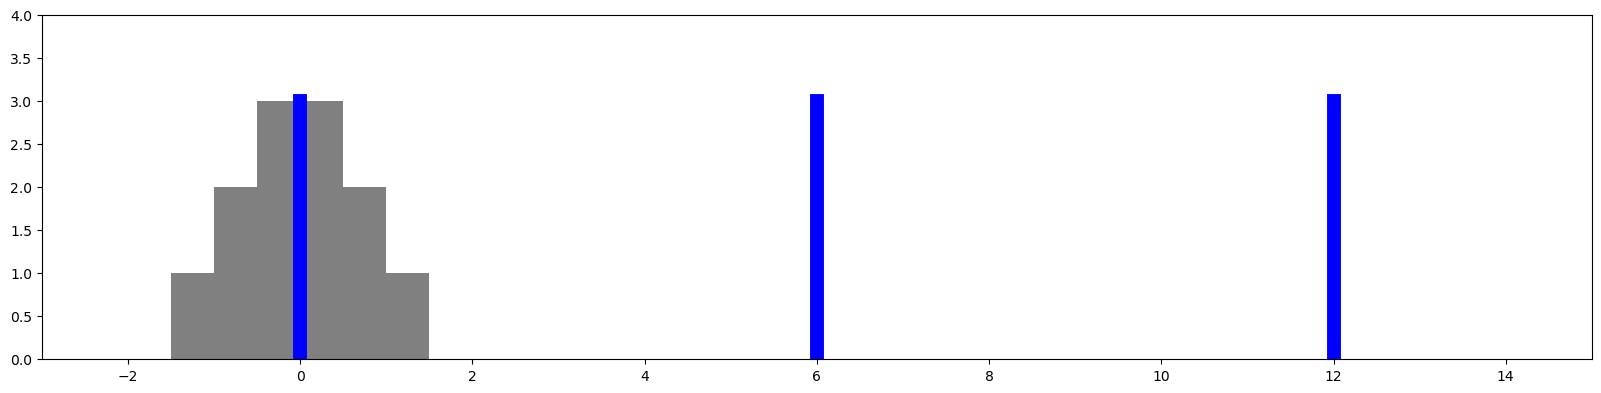

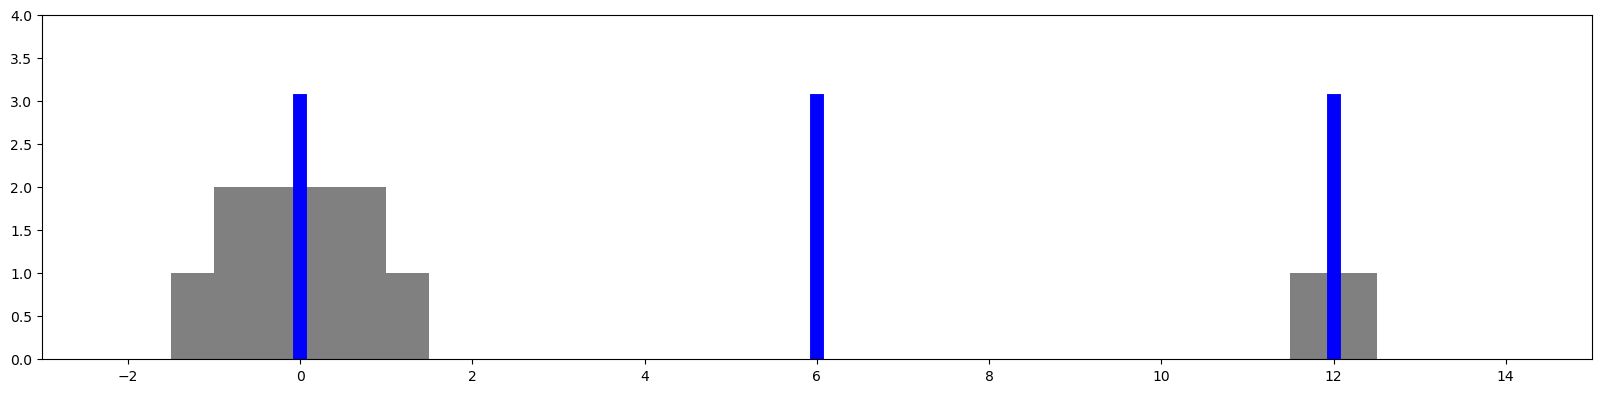

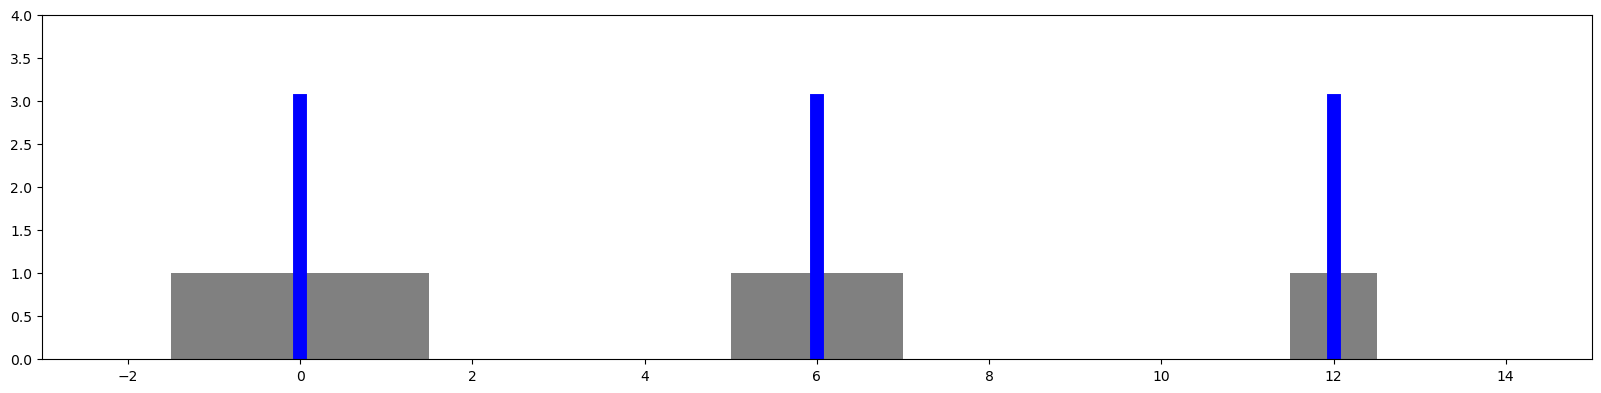

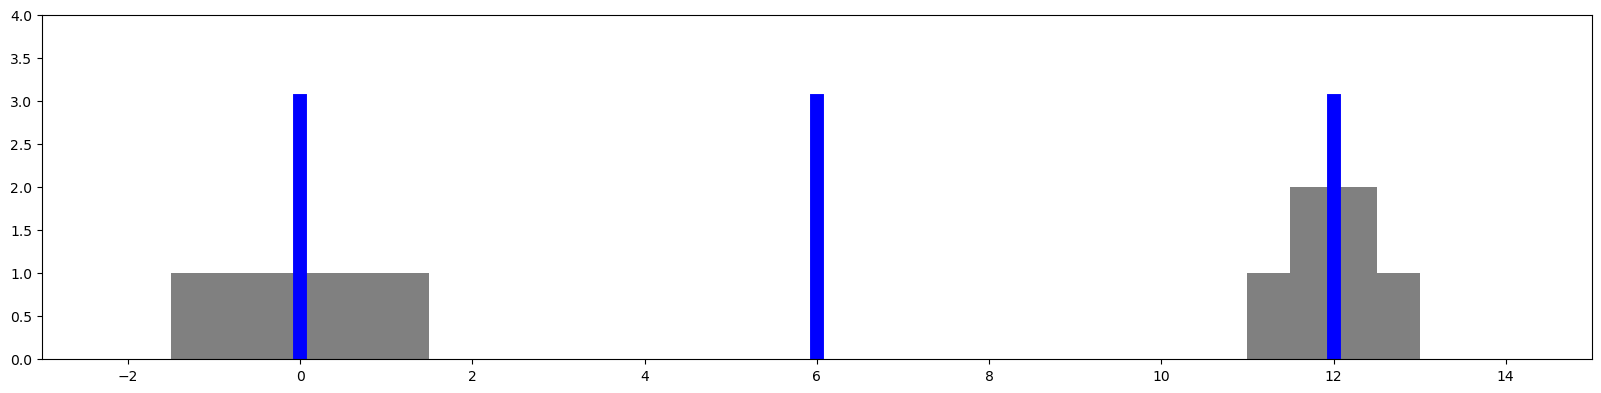

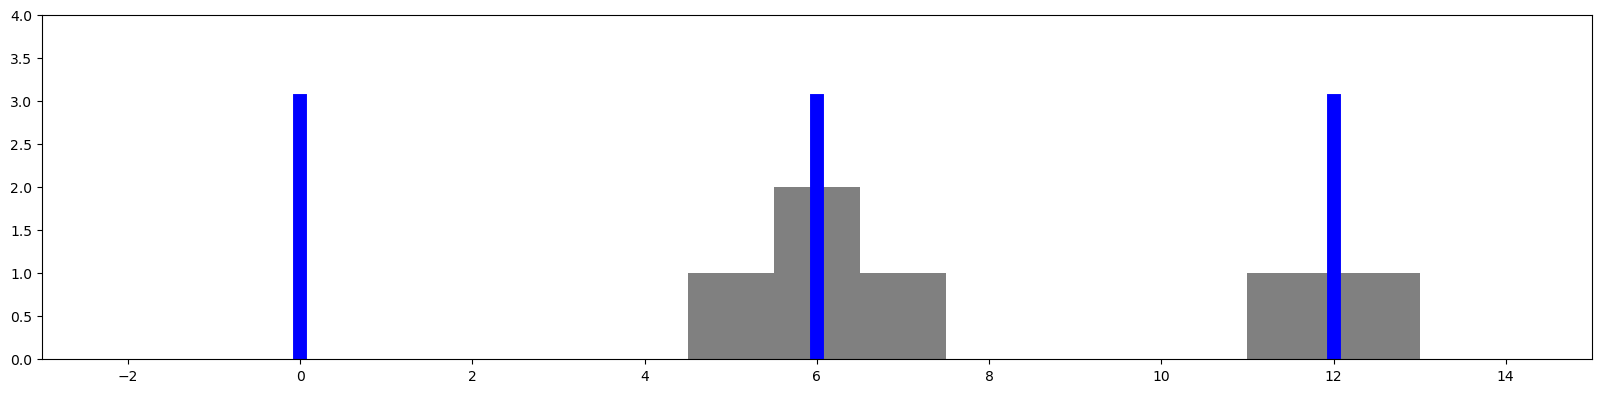

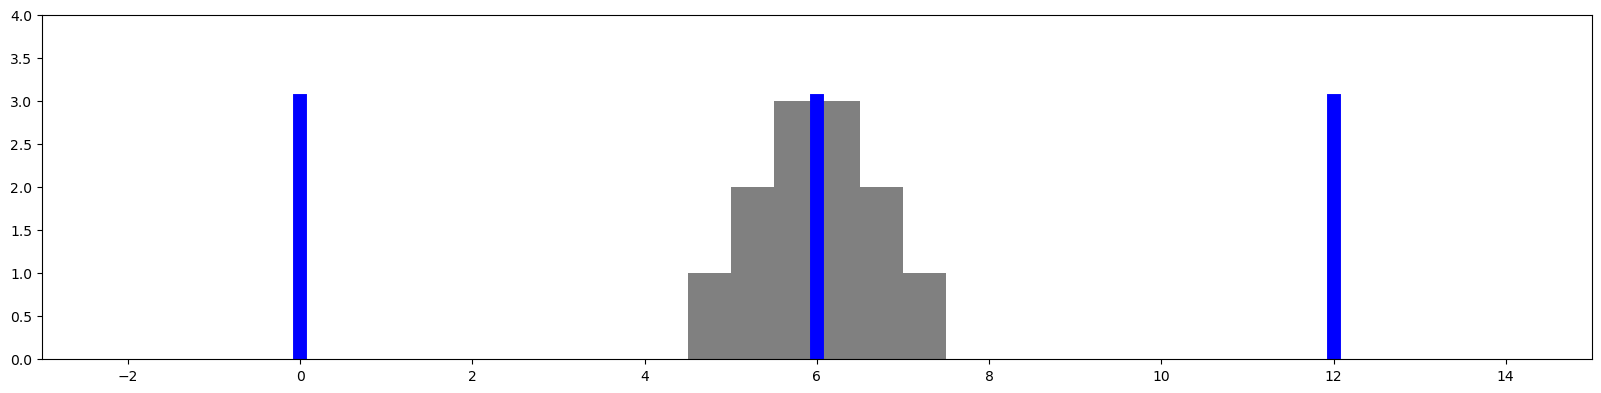

(44, [deque([]), deque([3, 2, 1]), deque([])])

In [13]:
resolution_opt(3,1)

On peut s'interesser aux nombres d'opérations nécessaires en fonction du nombre de disques :

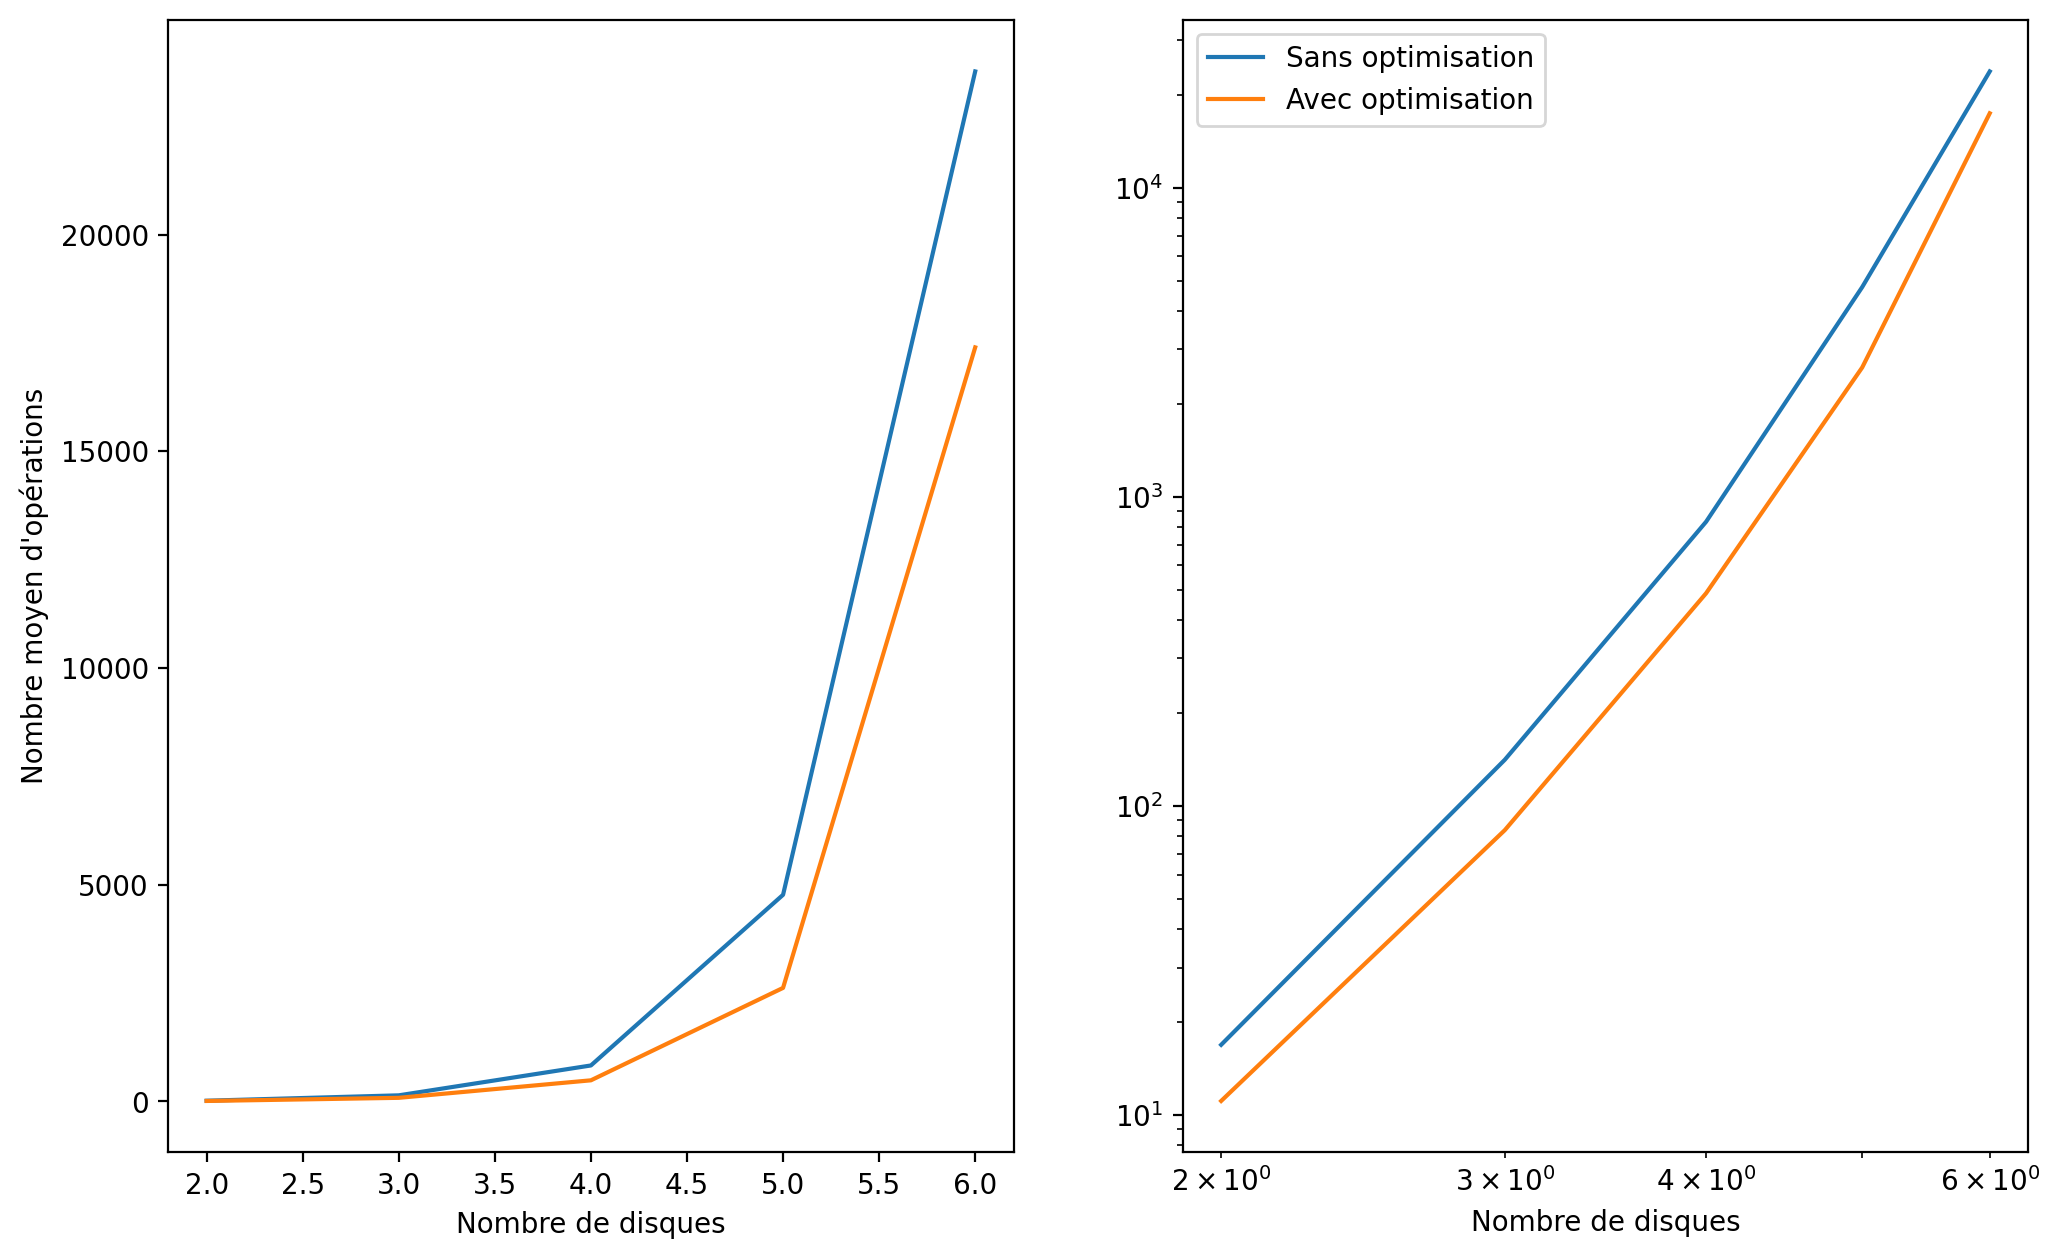

In [62]:
N,N_opt,K=[],[],[]
for i in range(2,7):
    N.append(sum([resolution(i,0)[0] for k in range(100)])/100) #moyenne sur 100 réalisations
    N_opt.append(sum([resolution_opt(i,0)[0] for k in range(100)])/100)
    K.append(i)

ratio, dpi =  1.5, 200
plt.figure(figsize=(8*ratio,5*ratio),dpi = dpi)
plt.subplot(121)
plt.plot(K,N,label="Sans optimisation")
plt.plot(K,N_opt,label="Avec optimisation")
plt.ylabel("Nombre moyen d'opérations")
plt.xlabel("Nombre de disques")
plt.subplot(122)
plt.plot(K,N,label="Sans optimisation")
plt.plot(K,N_opt,label="Avec optimisation")
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Nombre de disques")
plt.legend()
plt.show()

On est bien sûr loin de la solution optimale, permettant de résoudre le problème en $2^n$ mouvements : http://collection.cassetete.free.fr/1_bois/tour_hanoi/tour_hanoi.htm